In [11]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

In [12]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [13]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in /home/migtra/Escritorio/CNN/Yolo-digit-detector/weights.h5


In [15]:
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

In [16]:
DEFAULT_IMAGE_FOLDER

'/home/migtra/Escritorio/CNN/Yolo-digit-detector/tests/dataset/svhn/imgs'

In [14]:
img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "6.jpeg")]
fname = img_files[0]
img= cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


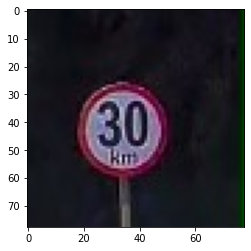

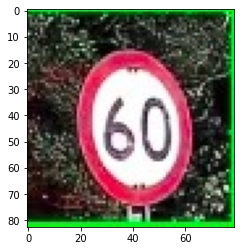

In [19]:
# 3. Load images
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "30.jpeg"), os.path.join(DEFAULT_IMAGE_FOLDER, "600.jpeg")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

0-boxes are detected.


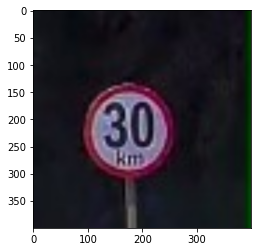

1-boxes are detected.


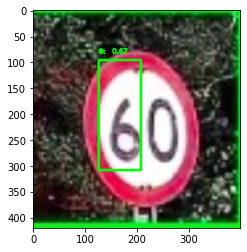

In [20]:


THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
